In [1]:
### >> Twitter Analysis << ##

In [2]:
# Importing Modules
import re
import json
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sb
import textblob as tb
import matplotlib.pyplot as plt
%matplotlib inline

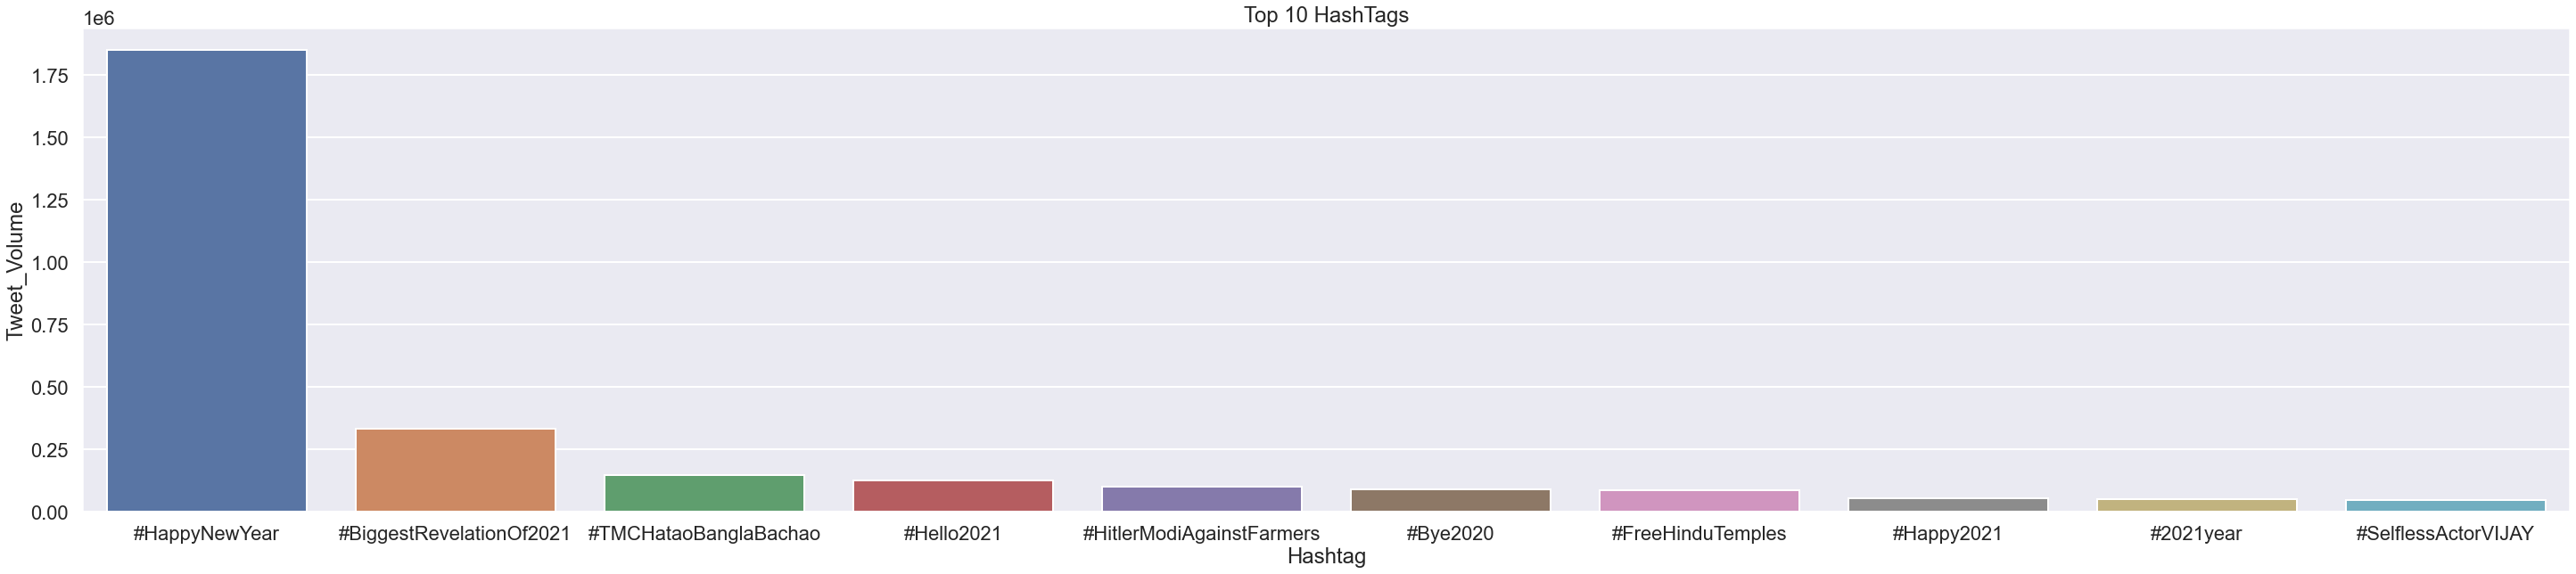

In [3]:
# Plotting Top 10 HashTags

df = pd.read_json('Dump/Top_HashTags.json')
sb.set_theme(context = "poster", style='darkgrid')

plt.figure(figsize=(50,10))
g = sb.barplot(data=df,x="Hashtag",y="Tweet_Volume")

plt.title("Top 10 HashTags")
plt.savefig('Images/Top_HashTags.png')

In [4]:
### EDA on Tweets ### 

In [5]:
# Creating Tweets Dataframe
Tweets = pd.read_json('Dump/Tweets.json')
Tweets.head()

,id,user_id,created_at,lang,retweet_count,favorite_count,source,hashtags,symbols,text
0,1345149895221633025,1249846759305744386,2021-01-01 23:28:21+00:00,en,362,0,Twitter for iPhone,"[HappyNewYear2021, happynewyear]",NaN,I pray that 2021 is better for each and everyo...
1,1345148050902142976,1334607597085683712,2021-01-01 23:21:01+00:00,en,24,0,Twitter for Android,"[BHIMPeSafePay, NewYear, DigitalPayments]",NaN,#BHIMPeSafePay | Make a resolution this #NewYe...
2,1345147866537488386,1334607597085683712,2021-01-01 23:20:17+00:00,en,38,0,Twitter for Android,[Digital],NaN,"#Digital is the new normal, locally &amp; glob..."
3,1345147378387410944,1038505455947997184,2021-01-01 23:18:21+00:00,hi,41,0,Twitter for iPhone,[],NaN,नई साल में मेरा उद्देश्य राजस्थान में विभिन्न ...
4,1345143506407309312,1212468130917666816,2021-01-01 23:02:58+00:00,en,94,0,Twitter for Android,[IPOB],NaN,"Biafra is our destination, #IPOB is the train,..."


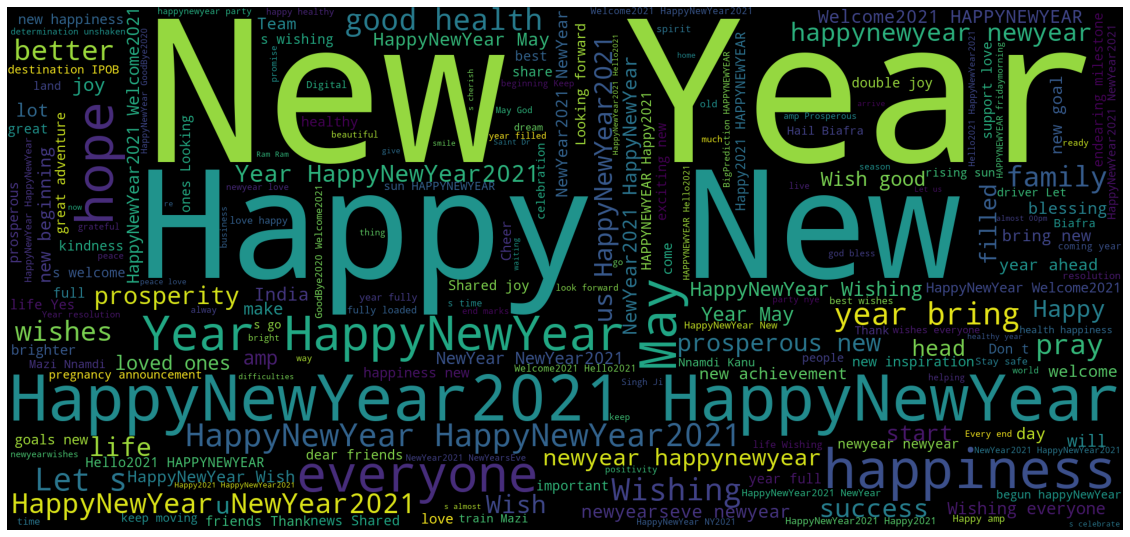

In [6]:
# Wordcloud of Tweets

df = Tweets
stop = set(wordcloud.STOPWORDS)
text = ""

TextList = list(df[df.lang.str.contains('en')]['text'])

for x in TextList:
    s = str(x)
    s.lower()
    s = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", s).split())
    text+=s+" "
        
cloud = wordcloud.WordCloud(width = 1920, height = 900,  background_color ='black', stopwords = stop, min_font_size = 10).generate(text)
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('Images/WordCloud_Tweets.png')

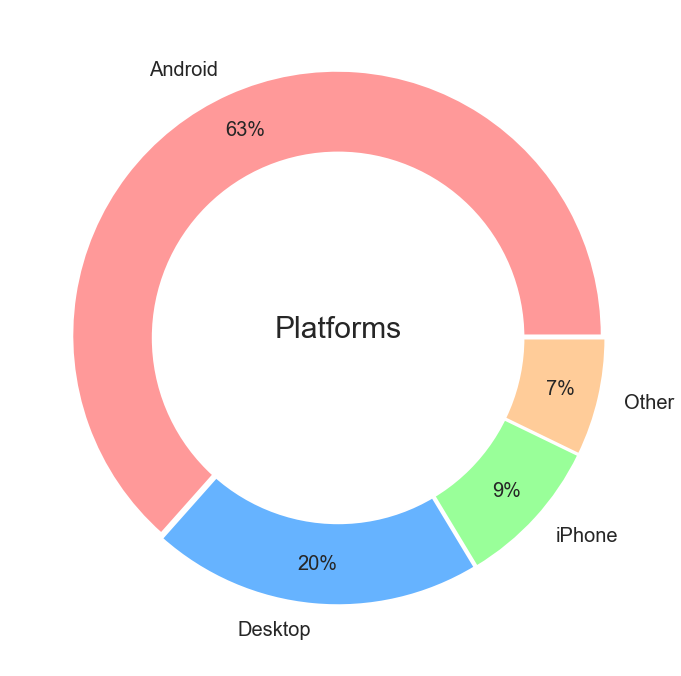

In [7]:
# Platforms used to Tweet

df = Tweets
labels = ["Android","Desktop","iPhone","Other"]
sizes = []
sizes.append(len(df[df['source'].str.contains('Twitter for Android')]))
sizes.append(len(df[df['source'].str.contains('Twitter Web App')]))
sizes.append(len(df[df['source'].str.contains('Twitter for iPhone')]))
sizes.append(len(df)-sum(sizes))
explode = (0.01,0.01,0.01,0.01)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(10,10))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', pctdistance=0.85, explode = explode,textprops={'fontsize': 20})
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
fig.gca().annotate("Platforms", xy=(0, 0), fontsize=30,ha="center")
plt.tight_layout()
plt.savefig('Images/Platforms.png')

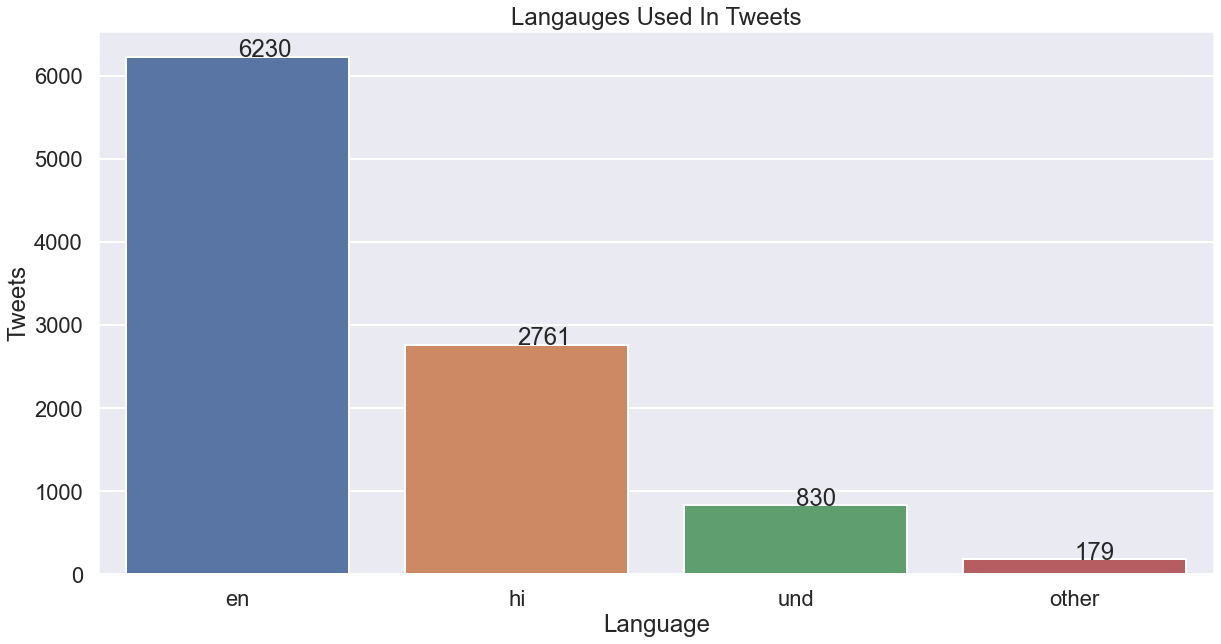

In [8]:
# Languages used in Tweets

df = Tweets
df = df.lang.value_counts().to_frame().reset_index() 

df.columns = ['Language','Tweets']
df = df.sort_values(['Tweets'],ascending=False)
df = df.append({'Language':'other', 'Tweets': df[3:]['Tweets'].sum()},ignore_index=True)
df = df.sort_values(['Tweets'],ascending=False)
df = df[:4]

groupedvalues=df.groupby('Language').sum().reset_index()

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(20,10))
g = sb.barplot(data=df,x="Language",y="Tweets")

Y = list(df['Tweets'])
for i in range(len(Y)):
    g.text(i,Y[i],str(Y[i]))

plt.title("Langauges Used In Tweets")
plt.savefig('Images/Language.png')


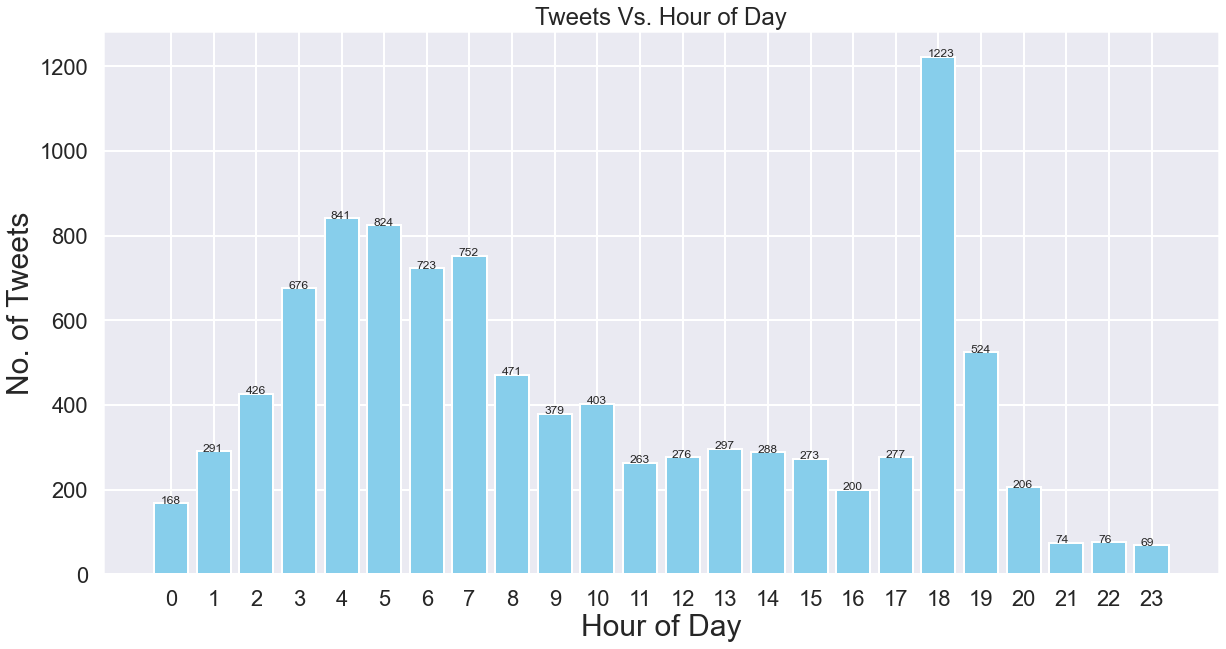

In [9]:
# Tweets Vs. Hour of Day

df = Tweets

Activity = {i:0 for i in range(24)}

for i in df['created_at']:
    Activity[int(str(i)[11:13])]+=1

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(20,10))
x = [str(i) for i in Activity]
y = [Activity[i] for i in Activity]
plt.bar(x,y,color='skyblue')
for i in range(len(y)):
    plt.text(i-0.25,y[i],str(y[i]),fontsize=12)
plt.xlabel("Hour of Day",fontsize =30) 
plt.ylabel("No. of Tweets",fontsize = 30) 
plt.title("Tweets Vs. Hour of Day")
plt.savefig('Images/Tweeting_Hours.png')

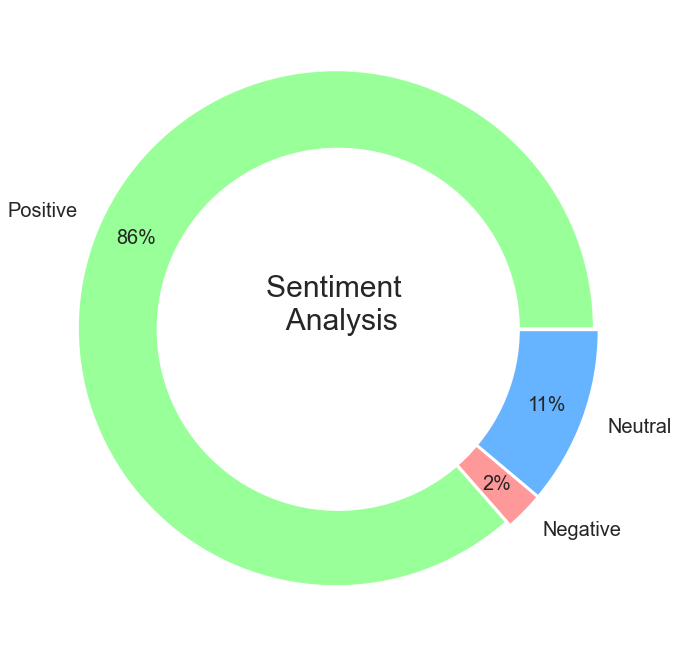

In [10]:
# Sentiment Analysis

df = Tweets
Tweet_Texts = df[df.lang.str.contains('en')]['text'] 

Positive = 0
Negative = 0
Neutral = 0

for T in Tweet_Texts:
    Cleaned_Text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", T).split())
    Result = tb.TextBlob(Cleaned_Text).sentiment.polarity
    if Result > 0: Positive+=1
    elif Result < 0: Negative+=1
    else: Neutral+=1

labels = ["Positive","Negative","Neutral"]
sizes = [Positive,Negative,Neutral]

explode = (0.01,0.01,0.01)
colors = ['#99ff99','#ff9999','#66b3ff']

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(10,10))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', pctdistance=0.85, explode = explode,textprops={'fontsize': 20})
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) 
fig.gca().annotate("Sentiment \n Analysis", xy=(0, 0), fontsize=30,ha="center")
plt.tight_layout()
plt.savefig('Images/Sentiments.png')

In [11]:
### EDA on Users ### 

In [12]:
# Creating Users Dataframe
Users = pd.read_json('Dump/Users.json')
Users.head()

,id,name,screen_name,created_at,location,protected,followers_count,friends_count,favourites_count,verified
0,1249846759305744386,bahar uddin,baharud14408396,2020-04-13 23:48:06+00:00,,False,15,30,7177,False
1,1334607597085683712,Vipul,Vipul041220,2020-12-03 21:17:14+00:00,कोई नी,False,2,17,346,False
2,1334607597085683712,Vipul,Vipul041220,2020-12-03 21:17:14+00:00,कोई नी,False,2,17,346,False
3,1038505455947997184,Nikhil Patre,nikhil_patre,2018-09-08 19:12:50+00:00,,False,54,34,5274,False
4,1212468130917666816,Chukwu,Aba90788437,2020-01-01 20:18:39+00:00,Biafra,False,187,242,17180,False


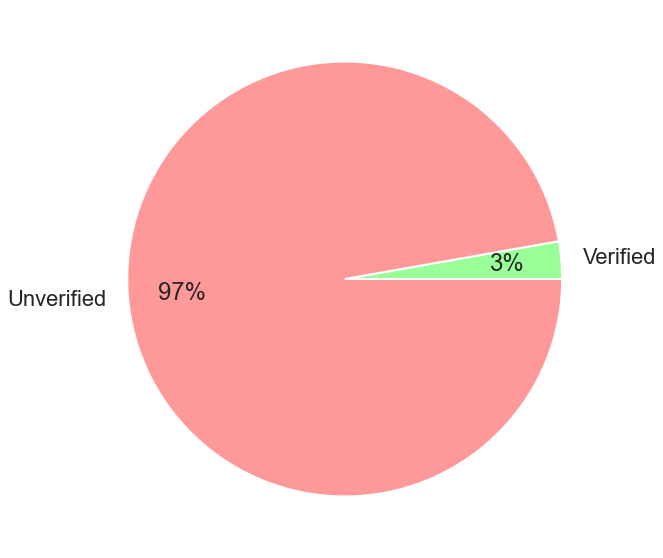

In [13]:
# Percentage of Verified Accounts

df = Users

Yes = len(df[df.verified==True])
No = len(df[df.verified==False])

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(20,10))
x = [Yes,No]
plt.pie(x,labels=["Verified","Unverified"],explode=(0,0),colors=['#99ff99','#ff9999'], autopct='%1.0f%%', startangle=0,   pctdistance=0.75,labeldistance=1.1)
plt.savefig('Images/Verified.png')


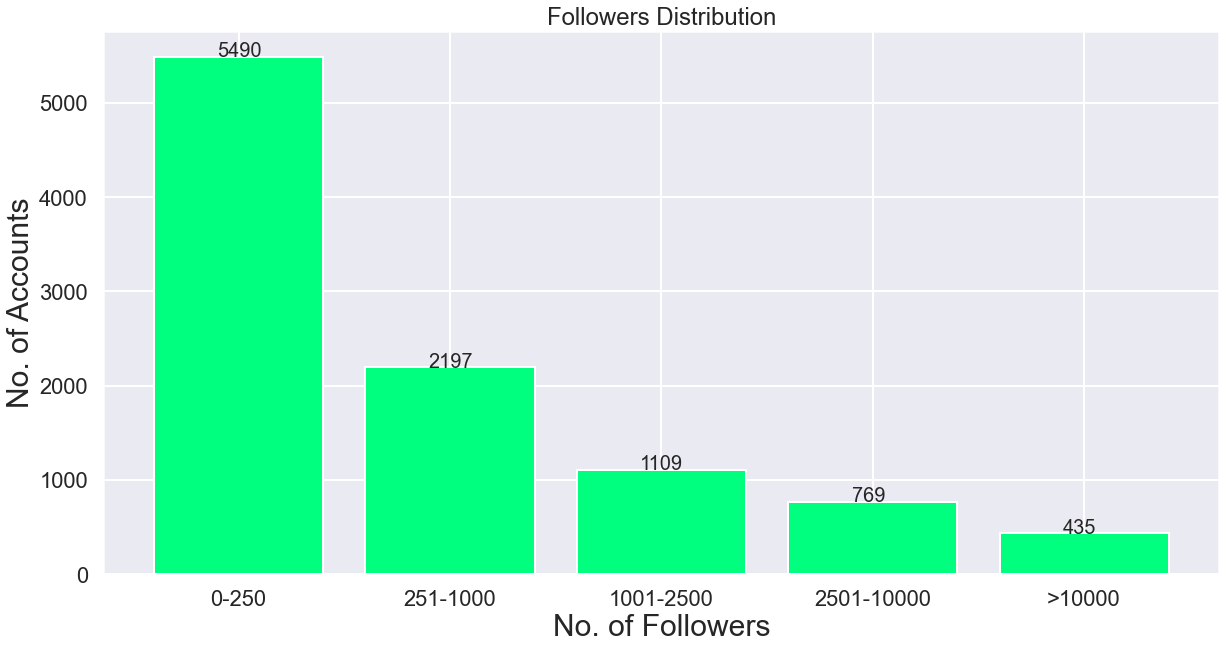

In [14]:
# Followers Distribution

df = Users
Followers = list(df['followers_count'])

D = {'0-250':0,'251-1000':0,'1001-2500':0,'2501-10000':0,'>10000':0}

for i in Followers:
    if i<=250:D['0-250']+=1
    elif i<=1000:D['251-1000']+=1
    elif i<=2500:D['1001-2500']+=1
    elif i<=10000:D['2501-10000']+=1
    else:D['>10000']+=1

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(20,10))
x = [i for i in D]
y = [D[i] for i in D]
plt.bar(x,y,color='springgreen')
for i in range(len(y)):
    plt.text(i-0.1,y[i],str(y[i]),fontsize=20)
plt.xlabel("No. of Followers",fontsize =30) 
plt.ylabel("No. of Accounts",fontsize = 30) 
plt.title("Followers Distribution")
plt.savefig('Images/Followers.png')

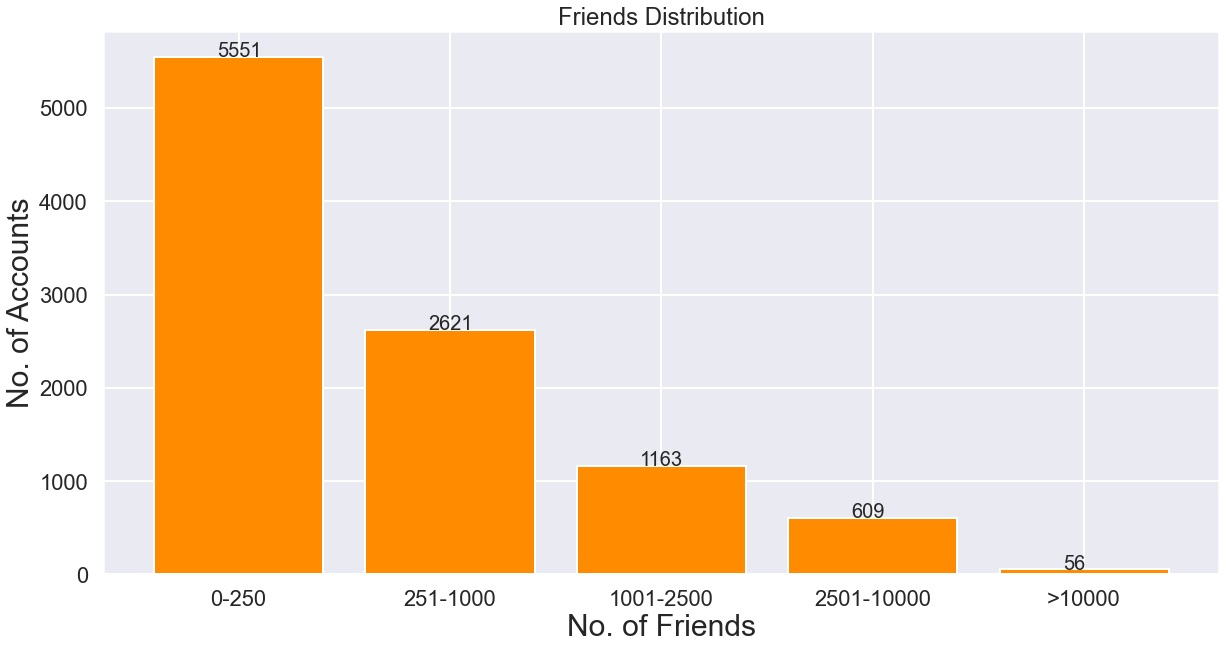

In [15]:
# Friends Distribution

df = Users
Friends = list(df['friends_count'])

D = {'0-250':0,'251-1000':0,'1001-2500':0,'2501-10000':0,'>10000':0}

for i in Friends:
    if i<=250:D['0-250']+=1
    elif i<=1000:D['251-1000']+=1
    elif i<=2500:D['1001-2500']+=1
    elif i<=10000:D['2501-10000']+=1
    else:D['>10000']+=1

sb.set_theme(context = "poster", style='darkgrid')
plt.figure(figsize=(20,10))
x = [i for i in D]
y = [D[i] for i in D]
plt.bar(x,y,color='darkorange')
for i in range(len(y)):
    plt.text(i-0.1,y[i],str(y[i]),fontsize=20)
plt.xlabel("No. of Friends",fontsize =30) 
plt.ylabel("No. of Accounts",fontsize = 30) 
plt.title("Friends Distribution")
plt.savefig('Images/Friends.png')

In [16]:
### END OF NOTEBOOK ###